In [ ]:
!pip install openpyxl --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def normal_test(pval):
  if pval >= 0.05:
    print('pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택')
    print('---------------------------------------------------------------')
  else:
    print('pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택')
    print('---------------------------------------------------------------')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/가공전/FH_processing.xlsx')
symbol_list = list(df['Symbol'])
len(symbol_list)

2295

In [ ]:
not_financial_df = pd.read_excel('/content/drive/MyDrive/not_financial_list.xlsx')
not_financial_list = list(not_financial_df.iloc[:, 1])
len(not_financial_list)

2186

In [ ]:
car_df_list = []
day_list = [5, 10, 20, 30, 40, 50]
for i in day_list:
  df = pd.read_excel(f'/content/drive/MyDrive/가공전/ALL_CAR{i}_READY.xlsx')

  condition_list = []
  for i in df['Ticker']:
    if i in symbol_list:
      condition_list.append(True)
    else:
      condition_list.append(False)
  df = df[condition_list]
  df = df.reset_index(drop = True)
  
  df[df.values == 0] = np.NaN
  df[df.values == 'NM'] = np.NaN

  df = df[df['Ticker'].isin(not_financial_list)]
  df = df.reset_index(drop = True)
  df = df.iloc[:, 1:]

  for i in list(df.columns[2:]):
    Q3 = df[i].quantile(q = 0.75)
    Q1 = df[i].quantile(q = 0.25)
    IQR= Q3 - Q1
    condition = (df[i] > (Q3 + IQR * 1.5)) | (df[i] < (Q1 - IQR * 1.5))
    df[i][condition] = np.NaN

  car_df_list.append(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### CAR5

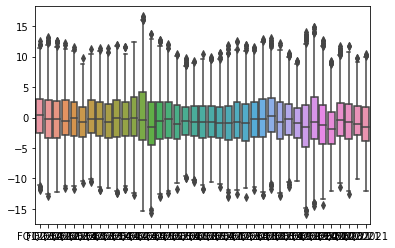

In [ ]:
df = car_df_list[0]
sns.boxplot(data = df.iloc[:, 2:])

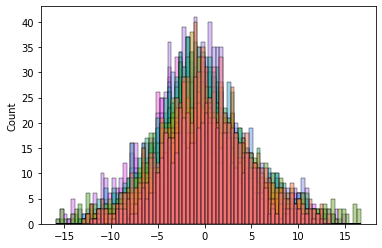

In [ ]:
sns.histplot(data = df.iloc[:, 2:], legend = False)

### CAR10

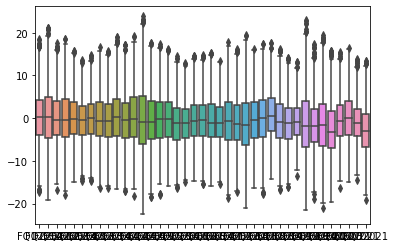

In [ ]:
df = car_df_list[1]
sns.boxplot(data = df.iloc[:, 2:])

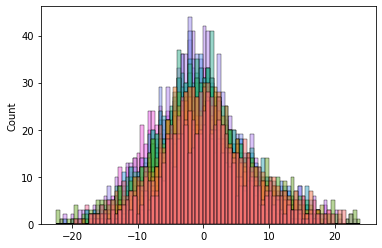

In [ ]:
sns.histplot(data = df.iloc[:, 2:], legend = False)

### CAR20

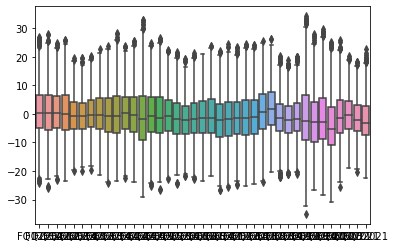

In [ ]:
df = car_df_list[2]
sns.boxplot(data = df.iloc[:, 2:])

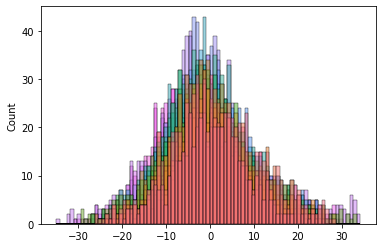

In [ ]:
sns.histplot(data = df.iloc[:, 2:], legend = False)

### CAR30

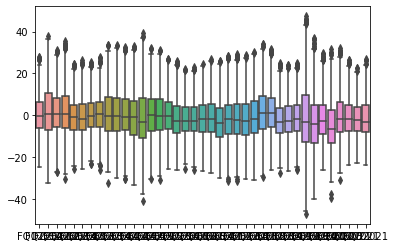

In [ ]:
df = car_df_list[3]
sns.boxplot(data = df.iloc[:, 2:])

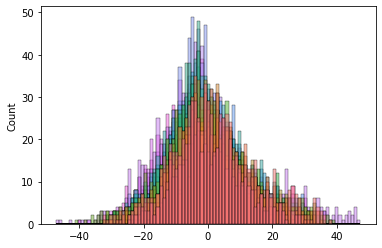

In [ ]:
sns.histplot(data = df.iloc[:, 2:], legend = False)

### CAR40

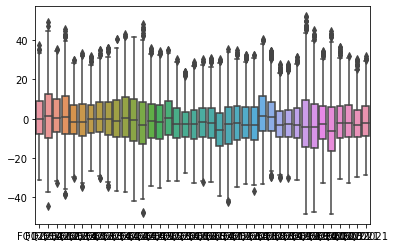

In [ ]:
df = car_df_list[4]
sns.boxplot(data = df.iloc[:, 2:])

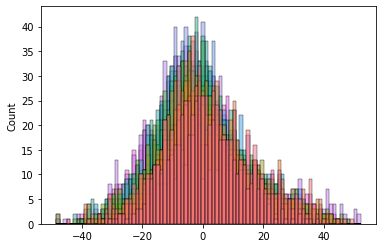

In [ ]:
sns.histplot(data = df.iloc[:, 2:], legend = False)

### CAR50

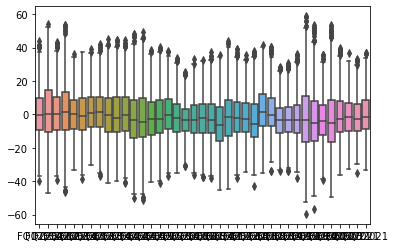

In [ ]:
df = car_df_list[5]
sns.boxplot(data = df.iloc[:, 2:])

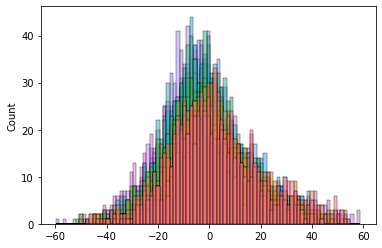

In [ ]:
sns.histplot(data = df.iloc[:, 2:], legend = False)

In [ ]:
for i, e in enumerate(car_df_list):
  e.to_excel(f'/content/drive/MyDrive/가공후/ALL_CAR{day_list[i]}_READY.xlsx', index = False)